In [1]:
import numpy as np
import csv
import matplotlib.pyplot as plt
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline

Using Theano backend.


In [2]:
# fixing a random seed for reproducibility
np.random.seed(1)

In [3]:
# Loading the preprocessed training dataset
reader=csv.reader(open("CARREFOUR_BOISSEUIL_CLEMENTINES_VRACS.csv","rb"),delimiter=',',quoting=csv.QUOTE_MINIMAL )
dataset=list(reader)
dataset =np.array(dataset)

In [4]:
dataset = np.array(dataset)

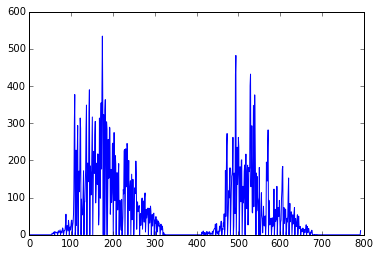

In [5]:
# Visualize Quantity solde in KG/day
plt.plot(dataset[:,1])
plt.show()

/usr/local/lib/python2.7/dist-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype |S18 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/preprocessing/data.py:324: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/preprocessing/data.py:359: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


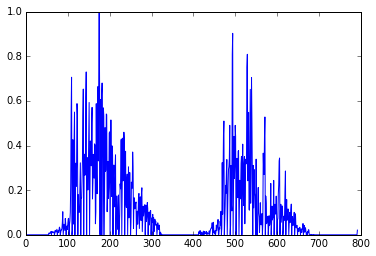

In [6]:
dataset[:,1].astype('float32')
# Normalizing to make it easier for the model to fit the training date
scaler = MinMaxScaler(feature_range=(0, 1))
d = scaler.fit_transform(dataset[:,1])
plt.plot(d)
plt.show()

In [10]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back)]
        dataX.append(a)
        dataY.append(dataset[i + look_back])
    return np.array(dataX), np.array(dataY)

In [11]:
X, Y = create_dataset(d,90)

In [12]:
X.shape

(702, 90)

In [13]:
# Reshape Input
X = np.reshape(X, (X.shape[0], 1, X.shape[1]))

In [14]:
X.shape

(702, 1, 90)

In [15]:
# Create Compile Model
model = Sequential()
model.add(LSTM(10,consume_less='mem', input_dim=90))
model.add(Dense(80))
model.add(Dense(40))
model.add(Dense(10))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='mean_squared_error', optimizer='adam')


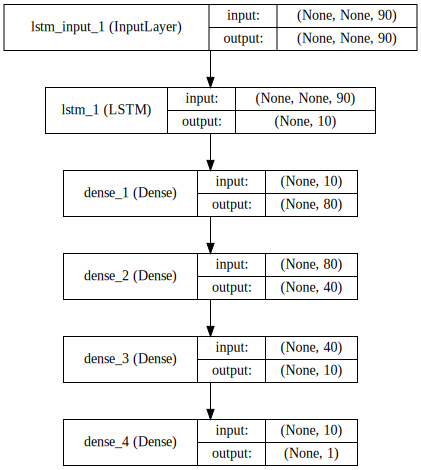

In [16]:
# Visualize Model
from IPython.display import SVG
from keras.utils.visualize_util import model_to_dot

SVG(model_to_dot(model,show_shapes=True).create(prog='dot', format='svg'))

## Training the model on the sails of sub_class CLEMENTINES_VRACS in the Magazin CARREFOUR_BOISSEUIL

In [17]:
model.fit(X, Y, nb_epoch=100, batch_size=1, verbose=2)

Epoch 1/100
1s - loss: 0.0236
Epoch 2/100
1s - loss: 0.0129
Epoch 3/100
1s - loss: 0.0106
Epoch 4/100
1s - loss: 0.0103
Epoch 5/100
1s - loss: 0.0087
Epoch 6/100
1s - loss: 0.0080
Epoch 7/100
1s - loss: 0.0079
Epoch 8/100
1s - loss: 0.0072
Epoch 9/100
1s - loss: 0.0069
Epoch 10/100
1s - loss: 0.0068
Epoch 11/100
1s - loss: 0.0061
Epoch 12/100
1s - loss: 0.0058
Epoch 13/100
1s - loss: 0.0057
Epoch 14/100
1s - loss: 0.0051
Epoch 15/100
1s - loss: 0.0048
Epoch 16/100
1s - loss: 0.0044
Epoch 17/100
1s - loss: 0.0043
Epoch 18/100
1s - loss: 0.0037
Epoch 19/100
1s - loss: 0.0036
Epoch 20/100
1s - loss: 0.0037
Epoch 21/100
1s - loss: 0.0030
Epoch 22/100
1s - loss: 0.0031
Epoch 23/100
1s - loss: 0.0028
Epoch 24/100
1s - loss: 0.0026
Epoch 25/100
1s - loss: 0.0025
Epoch 26/100
1s - loss: 0.0025
Epoch 27/100
1s - loss: 0.0022
Epoch 28/100
1s - loss: 0.0022
Epoch 29/100
1s - loss: 0.0022
Epoch 30/100
1s - loss: 0.0021
Epoch 31/100
1s - loss: 0.0020
Epoch 32/100
1s - loss: 0.0020
Epoch 33/100
1s -

## Testing the model on the sails of sub_class CLEMENTINES_VRACS in the Magazin CARREFOUR_CAEN

/usr/local/lib/python2.7/dist-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype |S18 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/preprocessing/data.py:324: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/preprocessing/data.py:359: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


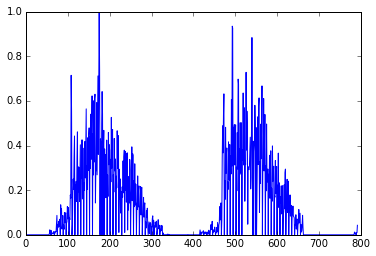

In [19]:
reader=csv.reader(open("CARREFOUR_CAEN_CLEMENTINES_VRACS.csv","rb"),delimiter=',',quoting=csv.QUOTE_MINIMAL )
t_dataset=list(reader)
t_dataset =np.array(t_dataset)
t_dataset[:,1].astype('float32')
scaler_t = MinMaxScaler(feature_range=(0, 1))
d_t = scaler_t.fit_transform(t_dataset[:,1])
plt.plot(d_t)
plt.show()

In [20]:
t_X, t_Y = create_dataset(d_t, 90)

In [21]:
t_X = np.reshape(t_X, (t_X.shape[0], 1, t_X.shape[1]))

In [24]:
t_X.shape

(702, 1, 90)

## Plotting the sails quantity predicted every day. these predictions are generated using the sails numbers of the 90 previous days
### Green line prediction .
### Blue line ground truth.

(702, 1)
(793, 1)


/usr/local/lib/python2.7/dist-packages/sklearn/preprocessing/data.py:377: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


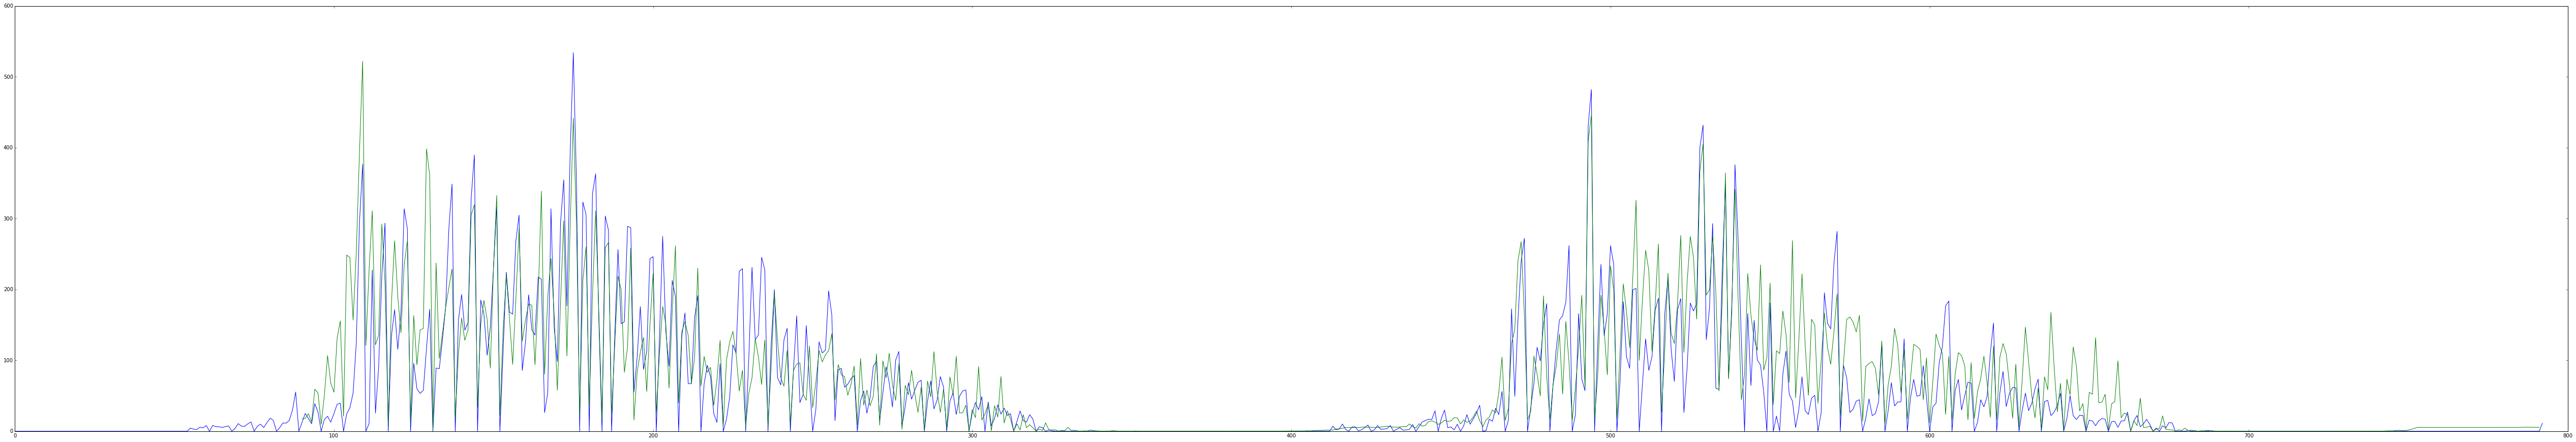

In [29]:
t_Predict = model.predict(t_X)
 
# shift test predictions for plotting
t_Predict_plot = np.empty_like(t_dataset[:,1:2])
t_Predict_plot[:, :] = np.nan
print t_Predict.shape
print t_Predict_plot.shape
t_Predict_plot[90:len(t_Predict)+90] = scaler.inverse_transform(np.array(t_Predict))
 
# plot ground truth and predictions

plt.figure(num=None, figsize=(90, 15), dpi=80, facecolor='w', edgecolor='k')
plt.plot(scaler.inverse_transform(np.array(d)))
plt.plot(t_Predict_plot)
plt.show()

In [36]:
# plt.figure(num=None, figsize=(20, 15), dpi=80, facecolor='w', edgecolor='k')
# plt.plot(scaler.inverse_transform(np.array(d))[435:495])
# plt.plot(t_Predict_plot[435:496])
# plt.show()

In [37]:
# plt.figure(num=None, figsize=(20, 15), dpi=80, facecolor='w', edgecolor='k')
# plt.plot(scaler.inverse_transform(np.array(d))[435:495])

# plt.show()

## Now let's Continue train on the data Magazin CARREFOUR_CAEN and test on another hypermarket

In [38]:
model.fit(t_X, t_Y, nb_epoch=20, batch_size=1, verbose=2)

Epoch 1/20
1s - loss: 0.0092
Epoch 2/20
1s - loss: 0.0060
Epoch 3/20
1s - loss: 0.0051
Epoch 4/20
1s - loss: 0.0046
Epoch 5/20
1s - loss: 0.0041
Epoch 6/20
1s - loss: 0.0037
Epoch 7/20
1s - loss: 0.0035
Epoch 8/20
1s - loss: 0.0031
Epoch 9/20
1s - loss: 0.0030
Epoch 10/20
1s - loss: 0.0028
Epoch 11/20
1s - loss: 0.0025
Epoch 12/20
1s - loss: 0.0023
Epoch 13/20
1s - loss: 0.0023
Epoch 14/20
1s - loss: 0.0022
Epoch 15/20
1s - loss: 0.0020
Epoch 16/20
1s - loss: 0.0018
Epoch 17/20
1s - loss: 0.0018
Epoch 18/20
1s - loss: 0.0016
Epoch 19/20
1s - loss: 0.0016
Epoch 20/20
1s - loss: 0.0015


## Testing the model on the sails of sub_class CLEMENTINES_VRACS in the Magazin CARREFOUR_DIJON

/usr/local/lib/python2.7/dist-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype |S18 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/preprocessing/data.py:324: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/preprocessing/data.py:359: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


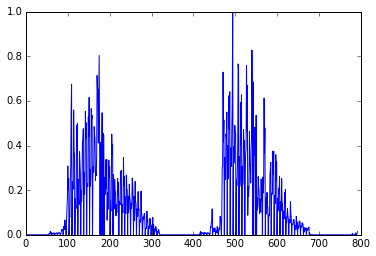

In [52]:
reader=csv.reader(open("CARREFOUR_DIJON_CLEMENTINES_VRACS.csv","rb"),delimiter=',',quoting=csv.QUOTE_MINIMAL )
t_dataset=list(reader)
t_dataset =np.array(t_dataset)
t_dataset[:,1].astype('float32')
scaler_t = MinMaxScaler(feature_range=(0, 1))
d_t = scaler_t.fit_transform(t_dataset[:,1])
plt.plot(d_t)
plt.show()

In [53]:
t_X, t_Y = create_dataset(d_t, 90)

In [54]:
t_X = np.reshape(t_X, (t_X.shape[0], 1, t_X.shape[1]))

(702, 1)
(793, 1)


/usr/local/lib/python2.7/dist-packages/sklearn/preprocessing/data.py:377: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


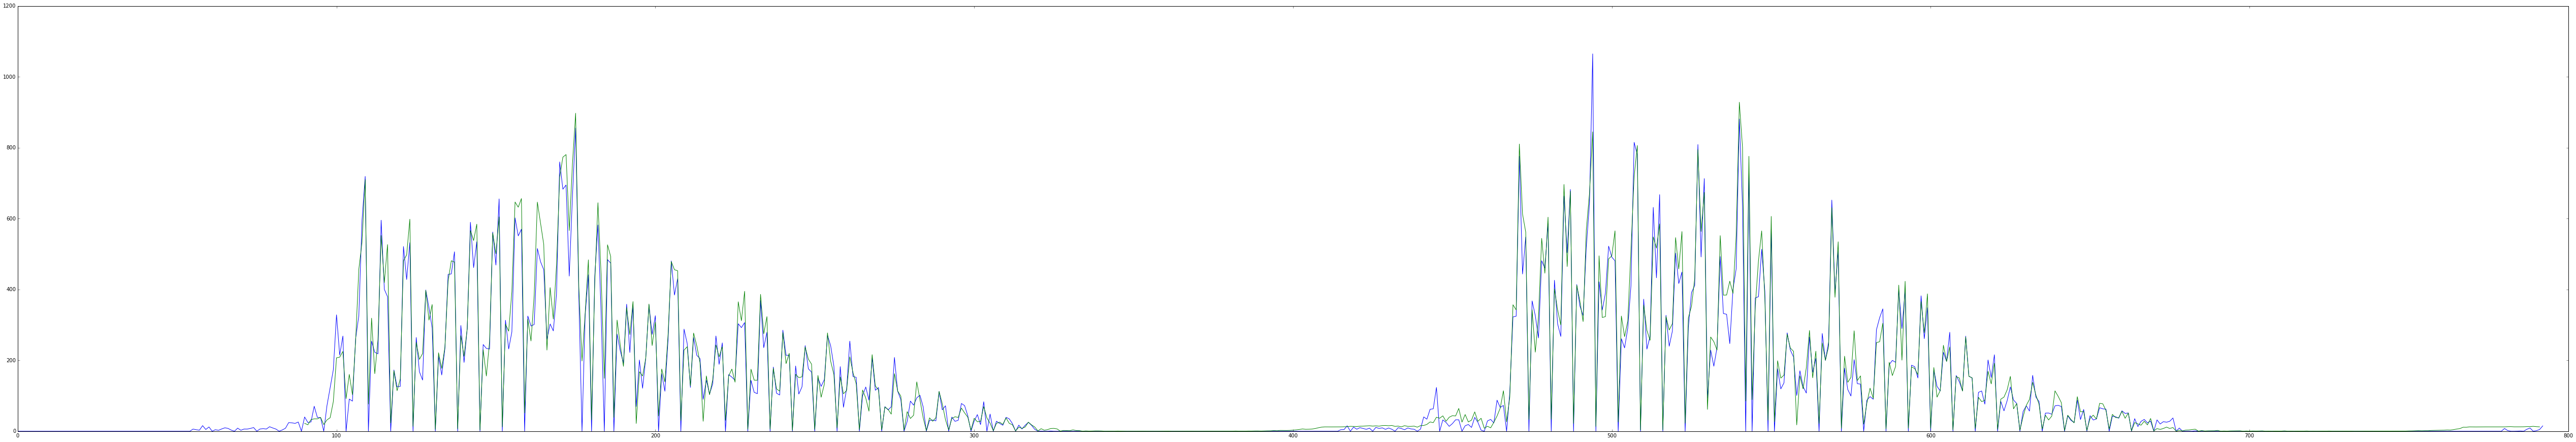

In [56]:
t_Predict = model.predict(t_X)
 
# shift test predictions for plotting
t_Predict_plot = np.empty_like(t_dataset[:,1:2])
t_Predict_plot[:, :] = np.nan
print t_Predict.shape
print t_Predict_plot.shape
t_Predict_plot[90:len(t_Predict)+90] = scaler_t.inverse_transform(np.array(t_Predict))
 
# plot ground truth and predictions

plt.figure(num=None, figsize=(90, 15), dpi=80, facecolor='w', edgecolor='k')
plt.plot(scaler_t.inverse_transform(np.array(d_t)))
plt.plot(t_Predict_plot)
plt.show()

In [57]:
testScore = model.evaluate(t_X, t_Y, verbose=0)
testScore

0.0011284563160221916

# Now let's Continue train on the data Magazin CARREFOUR_CAEN and test on another hypermarket

In [48]:
model.fit(t_X, t_Y, nb_epoch=20, batch_size=1, verbose=2)

Epoch 1/20
1s - loss: 0.0063
Epoch 2/20
1s - loss: 0.0050
Epoch 3/20
1s - loss: 0.0042
Epoch 4/20
1s - loss: 0.0036
Epoch 5/20
1s - loss: 0.0035
Epoch 6/20
1s - loss: 0.0034
Epoch 7/20
1s - loss: 0.0031
Epoch 8/20
1s - loss: 0.0030
Epoch 9/20
1s - loss: 0.0027
Epoch 10/20
1s - loss: 0.0025
Epoch 11/20
1s - loss: 0.0022
Epoch 12/20
1s - loss: 0.0022
Epoch 13/20
1s - loss: 0.0021
Epoch 14/20
1s - loss: 0.0019
Epoch 15/20
1s - loss: 0.0019
Epoch 16/20
1s - loss: 0.0016
Epoch 17/20
1s - loss: 0.0016
Epoch 18/20
1s - loss: 0.0015
Epoch 19/20
1s - loss: 0.0014
Epoch 20/20
1s - loss: 0.0013


## Testing the model on the sails of sub_class CLEMENTINES_VRACS in the Magazin CARREFOUR_PORTET_S-GARONNE

/usr/local/lib/python2.7/dist-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype |S18 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/preprocessing/data.py:324: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/preprocessing/data.py:359: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


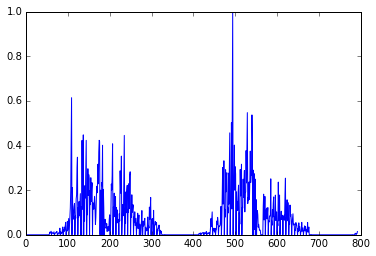

In [58]:
reader=csv.reader(open("CARREFOUR_PORTET_S-GARONNE_CLEMENTINES_VRACS.csv","rb"),delimiter=',',quoting=csv.QUOTE_MINIMAL )
t_dataset=list(reader)
t_dataset =np.array(t_dataset)
t_dataset[:,1].astype('float32')
scaler_t = MinMaxScaler(feature_range=(0, 1))
d_t = scaler_t.fit_transform(t_dataset[:,1])
plt.plot(d_t)
plt.show()

In [59]:
t_X, t_Y = create_dataset(d_t, 90)

In [60]:
t_X = np.reshape(t_X, (t_X.shape[0], 1, t_X.shape[1]))

(702, 1)
(793, 1)


/usr/local/lib/python2.7/dist-packages/sklearn/preprocessing/data.py:377: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


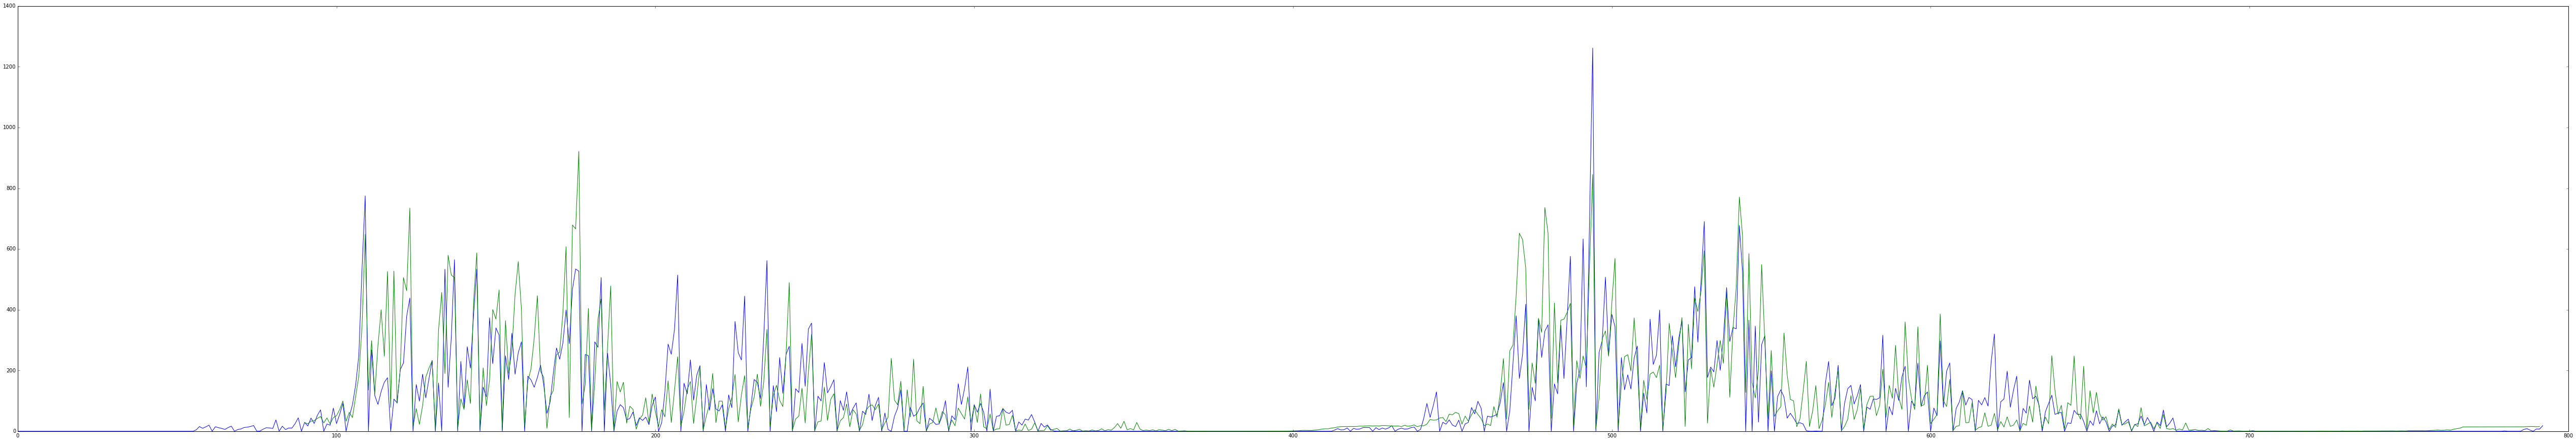

In [61]:
t_Predict = model.predict(t_X)
 
# shift test predictions for plotting
t_Predict_plot = np.empty_like(t_dataset[:,1:2])
t_Predict_plot[:, :] = np.nan
print t_Predict.shape
print t_Predict_plot.shape
t_Predict_plot[90:len(t_Predict)+90] = scaler_t.inverse_transform(np.array(t_Predict))
 
# plot ground truth and predictions

plt.figure(num=None, figsize=(90, 15), dpi=80, facecolor='w', edgecolor='k')
plt.plot(scaler_t.inverse_transform(np.array(d_t)))
plt.plot(t_Predict_plot)
plt.show()

In [62]:
testScore = model.evaluate(t_X, t_Y, verbose=0)
testScore

0.0052170229428053095